In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc

# BOKEH
import matplotlib.pyplot as plt

# Local imports
#------------------------------------------------
import WireDAQ.PandasPlus           # Make sure this import is after pandas
import WireDAQ.Constants as cst
import WireDAQ.NXCALS as nx
import WireDAQ.Parser as parser
import WireDAQ.Efficiency as eff


# Creating NXCALS variable containers
#------------------------------------------------
wires     = {'B1': [nx.NXCALSWire(loc = loc) for loc in ['L1B1','L5B1']],
             'B2': [nx.NXCALSWire(loc = loc) for loc in ['R1B2','R5B2']]}
beams     = [nx.NXCALSBeam(name) for name in ['B1','B2']]
LHC       = nx.NXCALSLHC()
b_slots   = np.arange(3564)
#------------------------------------------------


# Setting default values
#------------------------------------------------
_default_fig_width  = 2000
_default_fig_height = 400
_default_fig_pad    = 100

_default_device = 'DBLM'

_default_path     = '/eos/project/l/lhc-lumimod/LuminosityFollowUp/2023/'
_default_out      = '/eos/user/p/phbelang/www/Monitoring_BBCW/DBLM'


In [ ]:
FILL = 8786
data_path = _default_path
# Fixing data path
raw_data    = data_path + '/rawdata/'


# Finding filling pattern
#-------------------------------------------------
bb_df_b1,bb_df_b2 = parser.fill_filling_pattern(fill=FILL,data_path= raw_data,n_LR = 21)
#-------------------------------------------------

# Declaring master bin times
#-------------------------------------------------
dt = 60
unix_s,unix_e = parser.fill_unix_times(FILL,data_path=raw_data )
unix_bins     = np.arange(unix_s,unix_e,dt/1e-9)
#-------------------------------------------------

# Import and bin dBLM 
#-------------------------------------------------
variables = []
for beam in beams:
    variables += beam['dBLM_Amp'].values()

dblm = parser.from_parquet2bin(fill=FILL,variables = variables,bins=unix_bins,beamMode = None,data_path= raw_data )
    

In [ ]:
crop_by   = 10
data_dblm = {}
for beam in beams:
    for dblmType in ['V','H-V-S']:
        observable       = beam.dBLM_Amp[dblmType]
        times_dblm,_data = dblm[observable].dropna().to_2D()
        
        data_dblm[f'{beam.name}:' + dblmType] = _data[crop_by:-crop_by]

times = times_dblm[crop_by:-crop_by]


per_beam_results = {}
for beam in beams:
    dblmTypes = [f'{beam.name}:' + dblmType for dblmType in ['V','H-V-S']]

    # Substracting baseline
    #---------------------------------
    baseline = {}
    for dblmType in dblmTypes:
        baseline[dblmType] = np.min(data_dblm[dblmType],axis=0)
        # baseline[dblmType] = np.mean(np.sort(data_dblm[dblmType][:200,:],axis=0)[:100,:],axis=0).astype('int32')

    for dblmType in dblmTypes:
        data_dblm[dblmType] -= baseline[dblmType]
    #---------------------------------

    per_beam_results[f'{beam.name}:V']     = list(data_dblm[f'{beam.name}:V'])
    per_beam_results[f'{beam.name}:H-V-S'] = list(data_dblm[f'{beam.name}:H-V-S'])
    per_beam_results[f'{beam.name}:tot']   = list(data_dblm[f'{beam.name}:V']+data_dblm[f'{beam.name}:H-V-S'])
old = pd.DataFrame(per_beam_results,index=times)

In [ ]:
crop_by   = 10
data_dblm = {}
for beam in beams:
    for dblmType in ['V','H-V-S']:
        observable       = beam.dBLM_Amp[dblmType]
        times_dblm,_data = dblm[observable].dropna().to_2D()
        
        data_dblm[f'{beam.name}:' + dblmType] = _data[crop_by:-crop_by]

times = times_dblm[crop_by:-crop_by]


per_beam_results = {}
for beam in beams:
    dblmTypes = [f'{beam.name}:' + dblmType for dblmType in ['V','H-V-S']]

    # Substracting baseline
    #---------------------------------
    baseline = {}
    for dblmType in dblmTypes:
        # baseline[dblmType] = np.min(data_dblm[dblmType],axis=0)
        baseline[dblmType] = np.mean(np.sort(data_dblm[dblmType][:200,:],axis=0)[50:100,:],axis=0).astype('int32')

    for dblmType in dblmTypes:
        data_dblm[dblmType] -= baseline[dblmType]
        data_dblm[dblmType][data_dblm[dblmType]<= 0] = 0
    #---------------------------------

    per_beam_results[f'{beam.name}:V']     = list(data_dblm[f'{beam.name}:V'])
    per_beam_results[f'{beam.name}:H-V-S'] = list(data_dblm[f'{beam.name}:H-V-S'])
    per_beam_results[f'{beam.name}:tot']   = list(data_dblm[f'{beam.name}:V']+data_dblm[f'{beam.name}:H-V-S'])
processed = pd.DataFrame(per_beam_results,index=times)

In [ ]:
np.min(data_dblm[dblmType],axis=0)

In [ ]:
np.shape(np.mean(np.sort(data_dblm[dblmType][:200,:],axis=0)[:100,:],axis=0))

In [ ]:
np.min(data_dblm[dblmType],axis=0)

In [ ]:
np.mean(np.sort(data_dblm[dblmType][:200,:],axis=0)[:100,:],axis=0).astype('int32')

In [ ]:
np.shape(np.min(data_dblm[dblmType],axis=0))

In [ ]:
np.shape(data_dblm[dblmType])

In [ ]:
np.shape(data_dblm[dblmType][:200,:])


In [ ]:
data_dblm[dblmType][:200,:]

In [ ]:
np.sort(data_dblm[dblmType][:200,0])

In [ ]:
np.shape(np.mean(np.sort(data_dblm[dblmType][:200,:],axis=0)[:100,:],axis=0))

In [ ]:
processed

In [ ]:
dblm

In [ ]:
beam = beams[1]
dblmType = 'V'
observable = beam.dBLM_Amp[dblmType]
dblm[observable].dropna().apply(lambda line:line[1335])

In [ ]:
beam.dBLM_Amp['V'],beam.dBLM_Amp['H-V-S']

In [88]:
observable

'HC.TZ76.BLMDIAMOND3.5:AcquisitionIntegral:intSumBuf1'

In [91]:
processed['B2:V'].iloc[0].nbytes

14256

In [92]:
dblm[observable].iloc[0].nbytes

14256

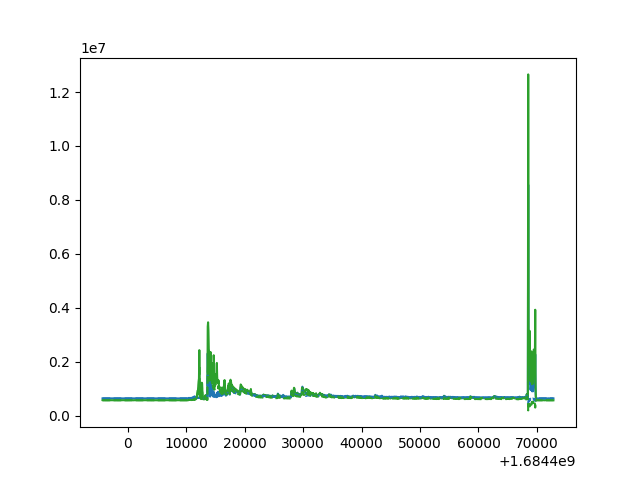

In [85]:
beam = beams[1]
bunches = [1334,1335]

plt.figure()
for bunch,ls in zip(bunches,['-','--']):
    for dblmType,color in zip(['V','H-V-S'],['C0','C2']):
        observable = beam.dBLM_Amp[dblmType]
        data = dblm[observable].dropna().apply(lambda line:line[bunch])
        plt.plot(data.index/1e9,data.values,ls=ls,color=color)
# plt.plot()

In [ ]:
beam = beams[1]
bunches = [1334,1335]

plt.figure()
for bunch,ls in zip(bunches,['-','--']):
    for dblmType,color in zip(['V'],['C0','C2']):#zip(['V','H-V-S'],['C0','C2']):
        observable = f'{beam.name}:{dblmType}'
        data = processed[observable].dropna().apply(lambda line:line[bunch])
        plt.plot(data.index/1e9,data.values,ls=ls,color=color)

plt.axvline(data.index[200]/1e9)

In [ ]:
beam.dBLM_Amp['V']

In [ ]:
beam = beams[1]
bunches = [1334,1335]

plt.figure()
for bunch,ls in zip(bunches,['-','--']):
    for dblmType,color in zip(['V'],['C0','C2']):#zip(['V','H-V-S'],['C0','C2']):
        observable = f'{beam.name}:{dblmType}'
        data = old[observable].dropna().apply(lambda line:line[bunch])
        plt.plot(data.index/1e9,data.values,ls=ls,color=color)

plt.axvline(data.index[200]/1e9)